In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global_1.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_deaths_global.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_recovered_global.csv
/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global.csv


In [67]:
df_confirmed = pd.read_csv('/kaggle/input/ece657aw20asg4coronavirus/time_series_covid19_confirmed_global.csv')

In [68]:
country = "Canada"
df_confirmed1 = df_confirmed[df_confirmed["Country/Region"] == country]

df_confirmed1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,1373,1423,1451,1567,1567,1732,1870,1870,1996,2397
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,1291,1336,1370,1445,1445,1490,1490,1517,1561,1575
37,Grand Princess,Canada,37.6489,-122.6655,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,217,221,230,243,242,246,246,246,250,250
39,New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,...,105,108,112,112,114,116,116,117,117,117
40,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,228,232,239,241,242,244,244,247,252,256
41,Nova Scotia,Canada,44.6820,-63.7443,0,0,0,0,0,0,...,310,342,407,428,445,474,517,549,579,606
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,1,1,...,5276,5759,6237,6648,7049,7470,7953,8447,9840,10456
43,Prince Edward Island,Canada,46.5107,-63.4168,0,0,0,0,0,0,...,25,25,25,25,25,25,25,26,26,26
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,10031,10912,11677,12292,12846,13557,14248,14860,15857,16798


In [69]:
df_confirmed2 = pd.DataFrame(df_confirmed1[df_confirmed1.columns[4:]].sum(),columns=["confirmed"])
df_confirmed2.index = pd.to_datetime(df_confirmed2.index,format='%m/%d/%y')
df_confirmed2

,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1
...,...
2020-04-13,25679
2020-04-14,27034
2020-04-15,28208
2020-04-16,30808


,confirmed
2020-04-08,19141
2020-04-09,20654
2020-04-10,22059
2020-04-11,23316
2020-04-12,24298
2020-04-13,25679
2020-04-14,27034
2020-04-15,28208
2020-04-16,30808
2020-04-17,32813


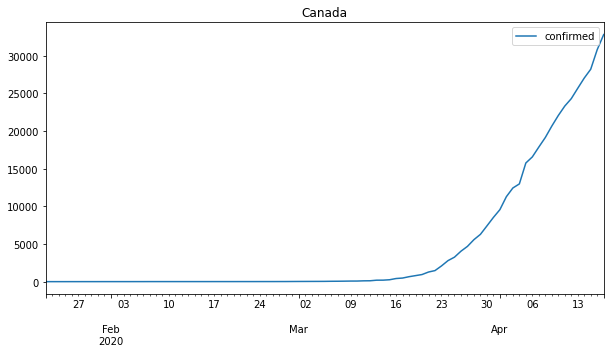

In [70]:
df_confirmed2.plot(figsize=(10,5),title="Canada")
df_new = df_confirmed2[["confirmed"]]
df_new.tail(10)

In [71]:
len(df_new)
x = len(df_new) - 5
x

82

In [72]:
train=df_new.iloc[:x]
test = df_new.iloc[x:]
train

,confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1
...,...
2020-04-08,19141
2020-04-09,20654
2020-04-10,22059
2020-04-11,23316


In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)#and divide every point by max value
scaled_test = scaler.transform(test)
scaled_train.shape

(82, 1)

In [74]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 5  ## number of steps
n_features = 1 ## number of features you want to predict (for univariate time series n_features=1)
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size=1)
len(generator)

77

In [75]:
x,y = generator[71]
x,y


(array([[[0.46440036],
         [0.51185283],
         [0.53411803],
         [0.64844843],
         [0.68166104]]]),
 array([[0.73553379]]))

In [76]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
model = Sequential()
model.add(LSTM(150,activation="relu",input_shape=(n_input,n_features)))
#model.add(Dropout(0.2))
model.add(Dense(75, activation='relu'))
model.add(Dense(units=1))
#model.add(Activation('softmax'))
#model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_3 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 76        
Total params: 102,601
Trainable params: 102,601
Non-trainable params: 0
_________________________________________________________________


In [77]:
validation_set = np.append(scaled_train[76],scaled_test)
validation_set=validation_set.reshape(6,1)
validation_set

array([[0.73553379],
       [1.05683595],
       [1.11260186],
       [1.16091859],
       [1.26792329],
       [1.35044037]])

In [78]:
n_input = 5
n_features = 1
validation_gen = TimeseriesGenerator(validation_set,validation_set,length=5,batch_size=1)

In [79]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)

In [80]:
model.fit_generator(generator,validation_data=validation_gen,epochs=100,callbacks=[early_stop],steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 1s 74ms/step - loss: 0.0554 - val_loss: 1.5564
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0456 - val_loss: 1.2962
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0526 - val_loss: 1.1381
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1022 - val_loss: 0.6754
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 5.2011e-04 - val_loss: 0.3627
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0152 - val_loss: 0.0834
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0031 - val_loss: 0.0184
Epoch 8/100
10/10 [==============================] - 0s 17ms/step - loss: 9.8782e-04 - val_loss: 6.0458e-06
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 6.7272e-04 - val_loss: 3.0634e-04
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 6.6159e-04 

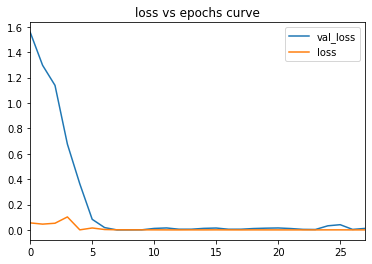

In [81]:
pd.DataFrame(model.history.history).plot(title="loss vs epochs curve")

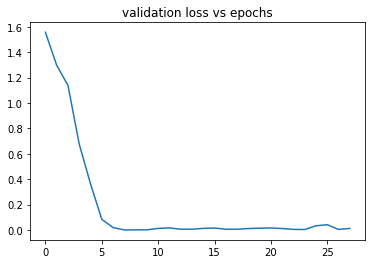

In [82]:
myloss = model.history.history["val_loss"]
plt.title("validation loss vs epochs")
plt.plot(range(len(myloss)),myloss)

Forecast

In [83]:
##Forecast
test_prediction = []

##last n points from training set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input,n_features)

In [84]:
for i in range(len(test)+7):
    current_pred = model.predict(current_batch)[0]
    test_prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [85]:
true_prediction = scaler.inverse_transform(test_prediction)
true_prediction[:,0]

array([28258.78804326, 30306.74547935, 32561.41791129, 35144.63991237,
       38229.64818454, 42085.23652577, 45878.07116938, 50375.22156906,
       55808.89523363, 62477.94632912, 70768.16599274, 81178.07319021])

In [86]:
time_series_array = test.index
for k in range(0,7):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))
time_series_array

DatetimeIndex(['2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24'],
              dtype='datetime64[ns]', freq=None)

In [87]:
df_forecast = pd.DataFrame(columns=["confirmed","confirmed_predicted"],index=time_series_array)
df_forecast.loc[:,"confirmed_predicted"] = true_prediction[:,0]
df_forecast.loc[:,"confirmed"] = test["confirmed"]
df_forecast

,confirmed,confirmed_predicted
2020-04-13,25679.0,28258.788043
2020-04-14,27034.0,30306.745479
2020-04-15,28208.0,32561.417911
2020-04-16,30808.0,35144.639912
2020-04-17,32813.0,38229.648185
2020-04-18,NaN,42085.236526
2020-04-19,NaN,45878.071169
2020-04-20,NaN,50375.221569
2020-04-21,NaN,55808.895234
2020-04-22,NaN,62477.946329


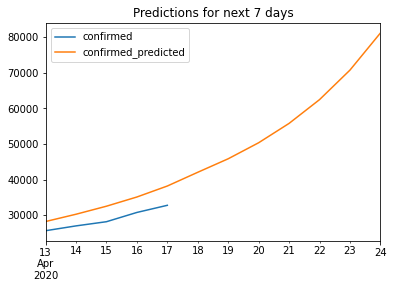

In [88]:
df_forecast.plot(title="Predictions for next 7 days")

In [89]:
MAPE = np.mean(np.abs(np.array(df_forecast["confirmed"][:5]) - np.array(df_forecast["confirmed_predicted"][:5]))/np.array(df_forecast["confirmed"][:5]))
print("MAPE is " + str(MAPE*100) + " %")

MAPE is 13.633915163124424 %


In [90]:
sum_errs = np.sum((np.array(df_forecast["confirmed"][:5]) - np.array(df_forecast["confirmed_predicted"][:5]))**2)
sum_errs

84464940.11566672

In [91]:
stdev = np.sqrt(1/(5-2) * sum_errs)
stdev

5306.126651198176

In [92]:
interval = 1.96 * stdev
interval

10400.008236348423

In [93]:
df_forecast["confirm_min"] = df_forecast["confirmed_predicted"] - interval
df_forecast["confirm_max"] = df_forecast["confirmed_predicted"] + interval
df_forecast

,confirmed,confirmed_predicted,confirm_min,confirm_max
2020-04-13,25679.0,28258.788043,17858.779807,38658.796280
2020-04-14,27034.0,30306.745479,19906.737243,40706.753716
2020-04-15,28208.0,32561.417911,22161.409675,42961.426148
2020-04-16,30808.0,35144.639912,24744.631676,45544.648149
2020-04-17,32813.0,38229.648185,27829.639948,48629.656421
2020-04-18,NaN,42085.236526,31685.228289,52485.244762
2020-04-19,NaN,45878.071169,35478.062933,56278.079406
2020-04-20,NaN,50375.221569,39975.213333,60775.229805
2020-04-21,NaN,55808.895234,45408.886997,66208.903470
2020-04-22,NaN,62477.946329,52077.938093,72877.954565


In [94]:
df_forecast["Model Accuracy"] = round((1-MAPE),2)
df_forecast

,confirmed,confirmed_predicted,confirm_min,confirm_max,Model Accuracy
2020-04-13,25679.0,28258.788043,17858.779807,38658.796280,0.86
2020-04-14,27034.0,30306.745479,19906.737243,40706.753716,0.86
2020-04-15,28208.0,32561.417911,22161.409675,42961.426148,0.86
2020-04-16,30808.0,35144.639912,24744.631676,45544.648149,0.86
2020-04-17,32813.0,38229.648185,27829.639948,48629.656421,0.86
2020-04-18,NaN,42085.236526,31685.228289,52485.244762,0.86
2020-04-19,NaN,45878.071169,35478.062933,56278.079406,0.86
2020-04-20,NaN,50375.221569,39975.213333,60775.229805,0.86
2020-04-21,NaN,55808.895234,45408.886997,66208.903470,0.86
2020-04-22,NaN,62477.946329,52077.938093,72877.954565,0.86


In [95]:
from datetime import datetime
df_forecast["Country"] = country
df_forecast

,confirmed,confirmed_predicted,confirm_min,confirm_max,Model Accuracy,Country
2020-04-13,25679.0,28258.788043,17858.779807,38658.796280,0.86,Canada
2020-04-14,27034.0,30306.745479,19906.737243,40706.753716,0.86,Canada
2020-04-15,28208.0,32561.417911,22161.409675,42961.426148,0.86,Canada
2020-04-16,30808.0,35144.639912,24744.631676,45544.648149,0.86,Canada
2020-04-17,32813.0,38229.648185,27829.639948,48629.656421,0.86,Canada
2020-04-18,NaN,42085.236526,31685.228289,52485.244762,0.86,Canada
2020-04-19,NaN,45878.071169,35478.062933,56278.079406,0.86,Canada
2020-04-20,NaN,50375.221569,39975.213333,60775.229805,0.86,Canada
2020-04-21,NaN,55808.895234,45408.886997,66208.903470,0.86,Canada
2020-04-22,NaN,62477.946329,52077.938093,72877.954565,0.86,Canada


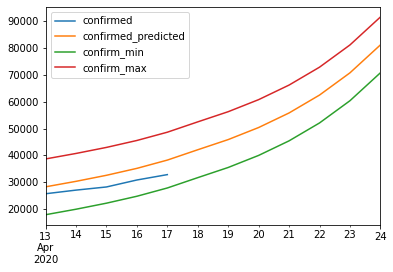

In [96]:
df_forecast.iloc[:,:4].plot()

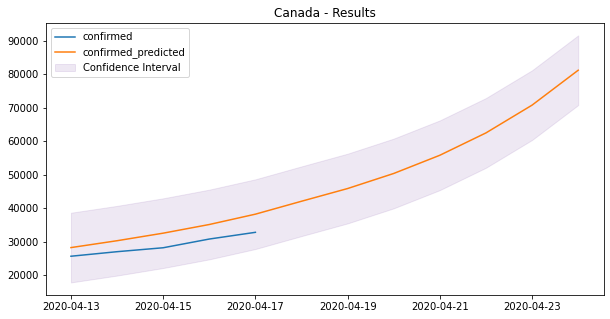

In [97]:
fig= plt.figure(figsize=(10,5))
plt.title("{} - Results".format(country))
plt.plot(df_forecast.index,df_forecast["confirmed"],label="confirmed")
plt.plot(df_forecast.index,df_forecast["confirmed_predicted"],label="confirmed_predicted")
#ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)
plt.fill_between(df_forecast.index,df_forecast["confirm_min"],df_forecast["confirm_max"],color="indigo",alpha=0.09,label="Confidence Interval")
plt.legend()
plt.show()